<a href="https://colab.research.google.com/github/wertrew21/ikote/blob/main/4_%EC%A0%95%EB%A0%AC_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 선택 정렬
처리되지 않은 데이터 중 가장 작은 데이터를 선택해\
맨 앞에 있는 데이터와 바꾸는 것을 반복.

- 시간 복잡도\
N번 만큼 가장 작은 수를 찾아서 맨 앞으로 보냄.\
N + (N - 1) + (N - 2) + ... + 2 = (N^2 + N - 2) / 2
= O(N^2)

In [ ]:
# 선택 정렬 소스코드
array = [7, 5, 9, 0, 3, 1, 6, 2, 4, 8]

for i in range(len(array)):
    min_index = i
    for j in range(i+1, len(array)):
        if array[min_index] > array[j]:
            min_index = j
    array[i], array[min_index] = array[min_index], array[i]

print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 삽입 정렬
처리되지 않은 데이터를 하나씩 골라 적절한 위치에 삽입.

ex) (5) 3 2 1 4
첫 번째 데이터 5는 그 자체로 정렬되어 있다고 판단, 두 번째 데이터 3이 \
어떤 위치로 들어갈 지 판단(5의 왼쪽 또는 오른쪽)
3은 5보다 작으므로 왼쪽으로 들어감. \
--> (3) (5) 2 1 4
이어서 2는 5보다 작고, 3보다도 작으므로 먼저 5 왼쪽으로 들어간 후 \
3 왼쪽으로 들어감.

- 시간 복잡도\
선택 정렬과 마찬가지로 반복문이 두 번 중첩되어 사용\
= O(N^2)로 생각할 수 있음.

In [ ]:
# 삽입 정렬 소스코드
array = [7, 5, 9, 0, 3, 1, 6, 2, 4, 8]

for i in range(1, len(array)):
    for j in range(i, 0, -1):
        if array[j] < array[j - 1]:
            array[j], array[j - 1] = array[j - 1], array[j]
        else:
            break
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 퀵 정렬
기준 데이터를 설정하고 그 기준보다 큰 데이터와 작은 데이터의 위치를 교환.\
일반적인 상황에서 가장 많이 사용, 많은 언어의 정렬 라이브러리의 근간.\
가장 기본적인 퀵 정렬은 첫 번째 데이터를 기준 데이터(Pivot)로 설정.

- 시간 복잡도: 평균 O(N * logN), 최악의 경우 O(N^2) \

 ** logN은 이진탐색, 즉, 둘로 나누는 작업을 계속 할 때 또는 \
 둘을 합치는 작업을 계속할 때 걸리는 시간 복잡도. \
 = N * logN은 시간복잡도 O(N)인 외부 루프와 O(logN)인 내부 루프가 있을 때. \
 퀵 정렬의 경우, 데이터의 갯수 N에 대해 이진 탐색 -> O(NlogN)

In [ ]:
# 퀵 정렬 소스코드: 일반적인 방식

array = [5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort(array, start, end):
    if start >= end: # 원소가 1개인 경우 종료
        return
    pivot = start # 피봇은 첫 번째 원소
    left = start + 1
    right = end

    while(left <= right):
        # 피봇보다 큰 데이터를 찾을 때까지 반복
        while(left <= end and array[left] <= array[pivot]):
            left += 1
        # 피봇보다 작은 데이터를 찾을 때까지 반복
        while(right > start and array[right] >= array[pivot]):
            right -= 1
        if(left > right): # 엇갈렸다면 작은 데이터와 피봇을 교체
            array[right], array[pivot] = array[pivot], array[right]
        else: # 엇갈리지 않았다면 작은 데이터와 큰 데이터를 교체
            array[left], array[right] = array[right], array[left]
    
    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬 수행
    quick_sort(array, start, right - 1) # left와 right가 엇갈렸으므로 right - 1
    quick_sort(array, right + 1, end)

quick_sort(array, 0, len(array) - 1)
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
# 퀵 정렬 소스코드: 파이썬의 장점을 살린 방식

array = [5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort(array):
    # 리스트가 하나 이하의 원소만 담고 있다면 종료
    if len(array) <= 1:
        return array
    pivot = array[0] # 피봇은 첫 번째 원소
    tail = array[1:] # 피봇을 제외한 리스트

    left_side = [x for x in tail if x <= pivot] # 분할된 왼쪽 부분
    right_side = [x for x in tail if x > pivot] # 분할된 오른쪽 부분

    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬 수행, 전체 리스트 반환
    return quick_sort(left_side) + [pivot] + quick_sort(right_side)

print(quick_sort(array))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 계수 정렬 Counting sort
**데이터의 크기 범위가 제한되어 정수 형태로 표현할 수 있을 때만** 사용 가능. \
매우 빠르게 동작. 공간 복잡도는 높음.
- 시간 복잡도 \
데이터 갯수 N, 데이터(양수) 중 최댓값 K일 때 최악의 경우에도 **O(N + K)**.

- 공간 복잡도: **O(N + K)**. \
데이터가 0, 999,999 단 2개만 존재하는 것과 같은 경우 심각한 비효율성 초래. \
동일한 값을 가지는 데이터가 여러 개 등장할 때 효과적.

In [ ]:
# 계수 정렬 소스코드

# 모든 원소의 값이 0보다 크거나 같다고 가정
array = [7, 5, 9, 0, 3, 1, 6, 2, 9, 1, 4, 8, 0, 5, 2]
# 모든 범위를 포함하는 리스트 선언(모든 값은 0으로 초기화)
count = [0] * (max(array) + 1) # 0과 최대값까지 갯수

for i in range(len(array)):
    count[array[i]] += 1   # 각 데이터에 해당하는 인덱스의 값 증가

for i in range(len(count)):
    for j in range(count[i]):
        print(i, end = ' ')

0 0 1 1 2 2 3 4 5 5 6 7 8 9 9 

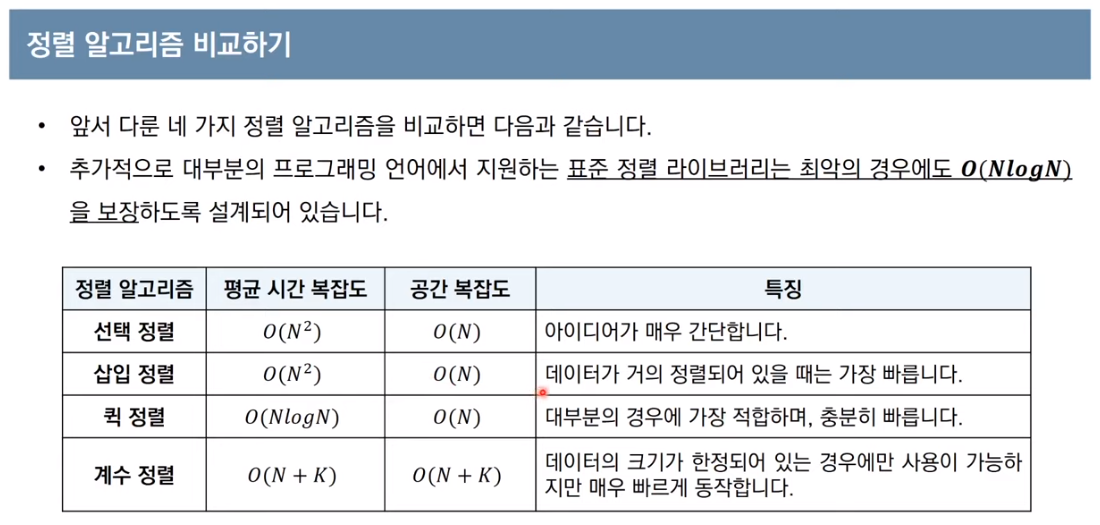

In [11]:
# <문제> 두 배열의 원소 교체

with open("/content/sort.txt", 'r') as f:
    n, k = map(int, f.readline().split())
    a = list(map(int, f.readline().split()))
    b = list(map(int, f.readline().split()))

def ele_exchg(a, b, k):
    if k == 0:
        return
    if min(a) >= max(b): # 이 경우 a의 모든 원소가 b의 모든 원소보다 크거나 같음
        return
    else:
        a[a.index(min(a))], b[b.index(max(b))] = max(b), min(a)
        ele_exchg(a, b, k-1)
    return a

ele_exchg(a, b, k)
print(sum(a))

26


In [ ]:
# <문제> 두 배열의 원소 교체: 답안 예시
n, k = map(int, input().split())
a = list(map(int, input().split()))
b = list(map(int, input().split()))

a.sort()
b.sort(reverse=True)

for i in range(k):
    if a[i] < b[i]:
        a[i], b[i] = b[i], a[i]
    else:
        break

print(sum(a))

In [6]:
a = [1, 2, 3]
b = [4, 5, 6]
a[a.index(min(a))], b[b.index(max(b))] = max(b), min(a)
print(a)
print(b)
print(sum(a))

[6, 2, 3]
[4, 5, 1]
11
